# Music Presence in NYC

This notebook contains some analysis and visualization of data provided by SONYC Urban Sound Tagging that explores various aspects and relationships between music presence, types of music, time, location, and more.


The recordings in this dataset are split into three categories - training, validation, and test - so I was first asked to find how many there were of each type (below). 

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

#read in data
annotations_df = pd.read_csv('annotations.csv')
annotations_df.head()

#create a new dataframe that cuts out unncessary columns and contains the information we want to work with related to music presence
musicdf = annotations_df.drop(columns=['annotator_id', '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence','6-3_ice-cream-truck_presence','7-1_person-or-small-group-talking_presence',
       '7-2_person-or-small-group-shouting_presence',
       '7-3_large-crowd_presence', '7-4_amplified-speech_presence',
       '7-X_other-unknown-human-voice_presence',
       '8-1_dog-barking-whining_presence',
       '1-1_small-sounding-engine_proximity',
       '1-2_medium-sounding-engine_proximity',
       '1-3_large-sounding-engine_proximity',
       '1-X_engine-of-uncertain-size_proximity', '2-1_rock-drill_proximity',
       '2-2_jackhammer_proximity', '2-3_hoe-ram_proximity',
       '2-4_pile-driver_proximity',
       '2-X_other-unknown-impact-machinery_proximity',
       '3-1_non-machinery-impact_proximity', '4-1_chainsaw_proximity',
       '4-2_small-medium-rotating-saw_proximity',
       '4-3_large-rotating-saw_proximity',
       '4-X_other-unknown-powered-saw_proximity', '5-1_car-horn_proximity',
       '5-2_car-alarm_proximity', '5-3_siren_proximity',
       '5-4_reverse-beeper_proximity',
       '5-X_other-unknown-alert-signal_proximity',
       '6-1_stationary-music_proximity', '6-2_mobile-music_proximity',
       '6-3_ice-cream-truck_proximity',
       '6-X_music-from-uncertain-source_proximity',
       '7-1_person-or-small-group-talking_proximity',
       '7-2_person-or-small-group-shouting_proximity',
       '7-3_large-crowd_proximity', '7-4_amplified-speech_proximity',
       '7-X_other-unknown-human-voice_proximity',
       '8-1_dog-barking-whining_proximity', '1_engine_presence',
       '2_machinery-impact_presence', '3_non-machinery-impact_presence',
       '4_powered-saw_presence', '5_alert-signal_presence', '7_human-voice_presence','8_dog_presence']).groupby(['split', 'sensor_id', 'audio_filename', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour']).sum()>0
musicdf1 = musicdf.reset_index()

#change values 1,3,4 under borough column to reflect proper name
musicdf1['borough'] = musicdf1['borough'].replace(1, 'Manhattan')
musicdf1['borough'] = musicdf1['borough'].replace(3, 'Brooklyn')
musicdf1['borough'] = musicdf1['borough'].replace(4, 'Queens')

print(musicdf1.head())

#create a second df based of musicdf1 that contains only files that are true under music presence
musicdf2 = musicdf1[musicdf1['6_music_presence'] == True] 


#count the occurrences of music presence and print the results
validate = musicdf1[(musicdf1['split']=='validate') & (musicdf1['6_music_presence'] == True)].shape[0]
training = musicdf1[(musicdf1['split']=='train') & (musicdf1['6_music_presence'] == True)].shape[0]
test = musicdf1[(musicdf1['split']=='test') & (musicdf1['6_music_presence'] == True)].shape[0]

print('There are '+ str(validate) + ' occurrences of training music examples')
print('There are '+ str(training) + ' occurrences of validation music examples')
print('There are '+ str(test) + ' occurrences of testing music examples')


   split  sensor_id audio_filename    borough  block   latitude  longitude  \
0  train          1  01_000006.wav  Manhattan    541  40.730329 -73.998697   
1  train          1  01_000038.wav  Manhattan    541  40.730329 -73.998697   
2  train          1  01_000061.wav  Manhattan    541  40.730329 -73.998697   
3  train          1  01_000126.wav  Manhattan    541  40.730329 -73.998697   
4  train          1  01_000143.wav  Manhattan    541  40.730329 -73.998697   

   year  week  day  hour  6-1_stationary-music_presence  \
0  2017    17    0    10                          False   
1  2017    21    2    17                          False   
2  2017    27    5    20                           True   
3  2017    19    1     1                          False   
4  2016    49    1    10                          False   

   6-2_mobile-music_presence  6-X_music-from-uncertain-source_presence  \
0                      False                                     False   
1                      False

One aspect of each sample is the borough that it is located in. I was curious to see how much data was found in each borough. There are only three that were explored in this dataset; Manhattan, Brooklyn, and Queens. 

I found that a large majority was from Manhattan and there were barely any in Brooklyn. I have doubts that this is an accurate picture of music presence proportionally between the three boroughs, so perhaps this is due to sensor placement/location. Otherwise, based on my perception, it could be because there are greater levels of activity and "life", but I don't have a way to measure this. The third possibility is a combination of both: sensor placement and the activity in Manhattan in comparison to the other boroughs.

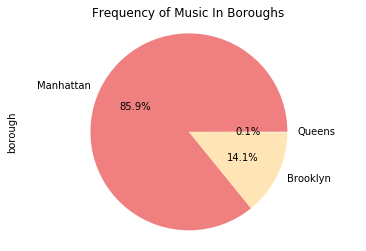

<Figure size 207360x20736 with 0 Axes>

In [2]:
#plot by borough

#find and tally occurrences in each borough
borough_freq = musicdf2['borough'].value_counts()
my_labels = 'Manhattan','Queens','Brooklyn'

#plot
my_colors = ['lightcoral','moccasin','lightcyan']
borough_freq.plot.pie(autopct = '%1.1f%%', colors = my_colors)
plt.title('Frequency of Music In Boroughs')
plt.axis('equal')
plt.figure(figsize=(2880,288))
plt.show()


## Music and Time
What follows in the next few cells is a look at music samples over the course of various measures of time: year, week, day, and hour. By exploring music throughout time, we might get insights on when there is more activity within NYC or find out if music presence stays largely the steady over the years. I noticed/felt as we look at the data on a smaller term (by day and hour) versus a longer term (by year and week), an accurate analysis seems to be more heavily reliant on different things. In other words, longer term visualization may prompt us to look at overall events and culture as a reason to why the data looks the way it does, but shorter term brings up questions on a more personal level having to do with people's habits and general behavior. 


### Year
In plotting the frequency of music samples by year, I found it interesting that there were much more from 2017. This could be reflective of the process and when they were able to collect the most recordings. It makes sense that 2016 has the lowest numbers perhaps because this was towards the beginning and there were maybe not as many sensors deployed or not as much recordings being collected. However, I would've imagined that as the years pass, there would be a growing number of recordings.

Text(0.5,1,'Presence of Music from 2016-2019')

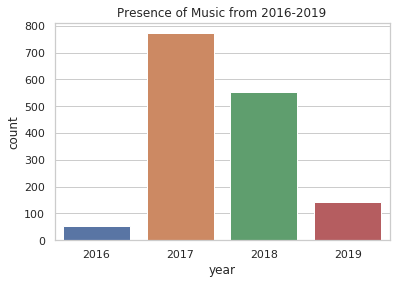

In [3]:
#plot frequency of music samples by the year

sns.set(style="whitegrid")
sns.countplot(x ='year', data = musicdf2)
plt.title('Presence of Music from 2016-2019')

### Week
In plotting the frequency of music samples by week, I noticed spikes both in the beginning and end of the year. I was informed that this is simply due to more logistical reasons with how the sensors captured recordings. Not knowing this I would've assumed that this may be due to the time around the holidays (end of the year) where there are many people coming to the city to enjoy festivities. However, it would've been interesting to look at when spikes occur and if there were any big events that day (concerts/holidays/etc.) which would maybe explain why; for example, week 13 this year would be March 13, 2020.

Text(0.5,1,'Presence of Music By Week')

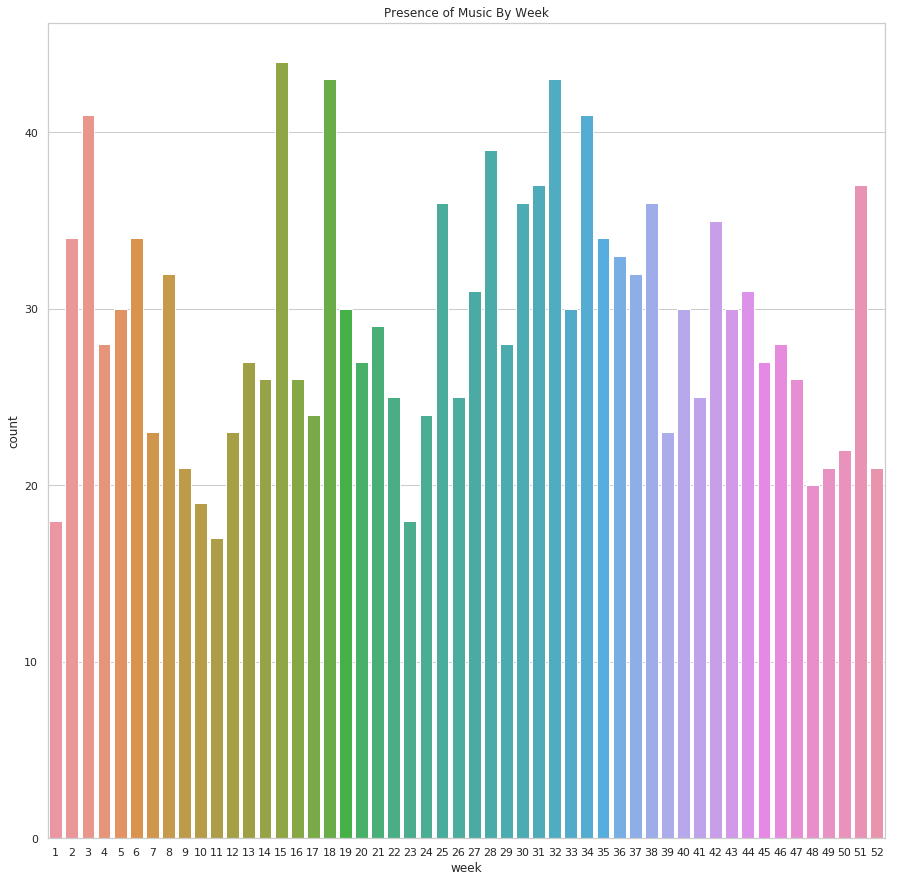

In [4]:
#plot frequency of music samples by week

plt.figure(figsize=(15,15))
sns.countplot(x ='week', data=musicdf2)
plt.title('Presence of Music By Week')

### Day

Plotting frequency by day revealed that there was a pretty even distribution all throughout, but Sunday had the least with Saturday following. Based on my own assumptions, I could make sense of why Sunday had the least as it is often associated with a day of rest - many people like to stay at home on Sunday after a long week - but this could be proven more easily with a survey. However, I was surprised to see that Saturday had the second least because I would expect more activity on this day of the weekend. Friday had the most (not by a lot) which could be due to it being the end of the week: lots of events, concerts, etc., tend to happen on Friday nights. 

Text(0.5,1,'Presence of Music by Day')

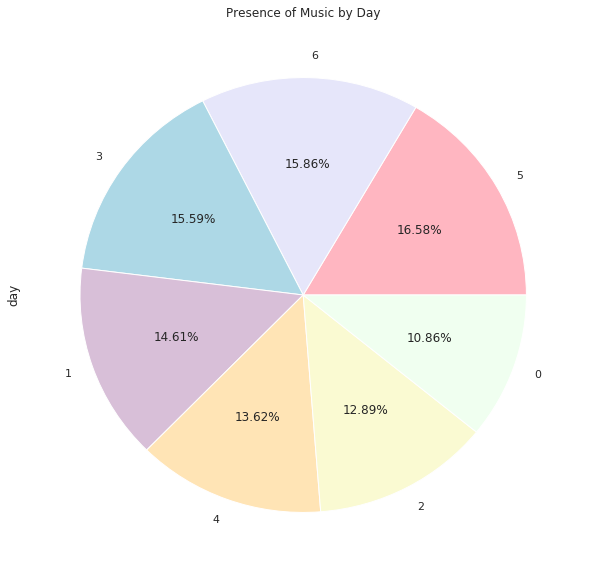

In [5]:
#plot frequency of music samples by day

plt.figure(figsize=(10,10))

#select colors
colors = ['lightpink','lavender','lightblue', 'thistle', 'moccasin','lightgoldenrodyellow', 'honeydew']

#count music frequency for each day
ax = musicdf2['day'].value_counts()

#plot data using information above
ax.plot.pie(colors = colors, autopct='%.2f%%')
plt.title('Presence of Music by Day')


### Hour

Looking at music by hour, the data begins to spike around 8 am which is when most people (during weekdays) are up for work, walking to work, starting their day. In general, there are more recordings from the middle to end of the day  at night there is generally more than the beginning of the day when people are asleep which probably accounts for when most people are awake or active.

Text(0.5,1,'Presence of Music by Hour')

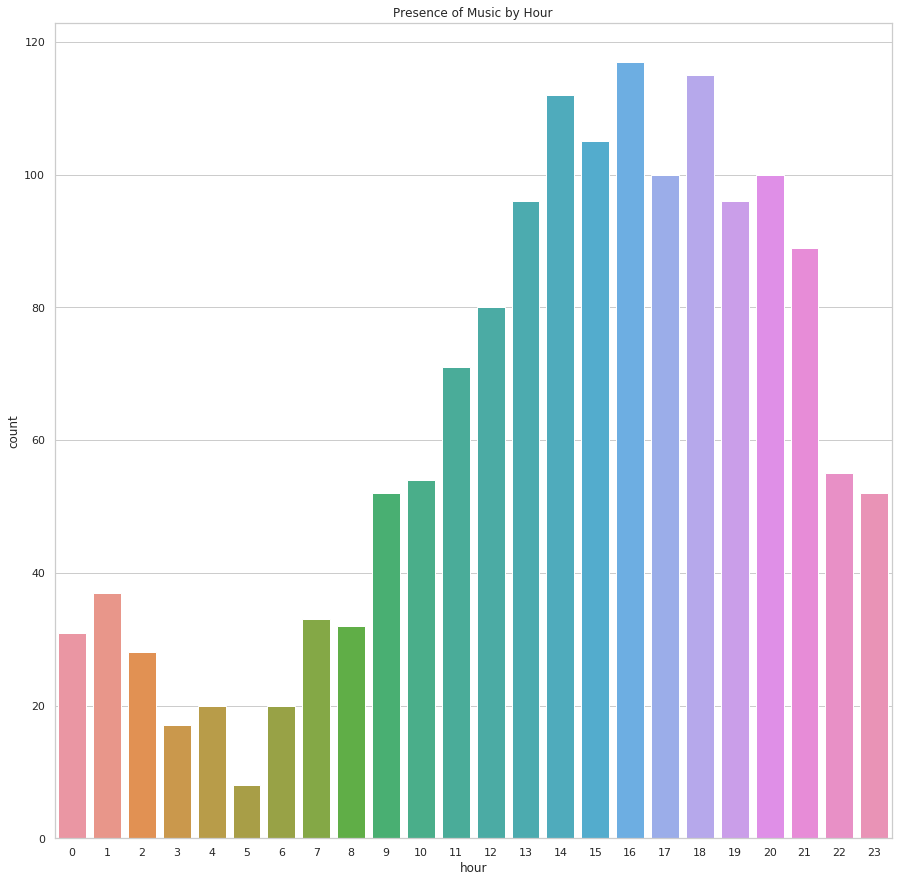

In [6]:
#plot frequency of music samples by hour

plt.figure(figsize = (15,15))
sns.set(style = "whitegrid")
sns.countplot(x ='hour', data = musicdf2)
plt.title('Presence of Music by Hour')

## Music and Sensors

I wanted to look at which sensors were capturing what because this might give us some more granular insight on location. Where there are larger spikes, it might be worth looking at where the sensor is located and it might help determine if the spike is simply due to the foot traffic around there, recurring events, and more. However, this data is currently limited without sensor location.

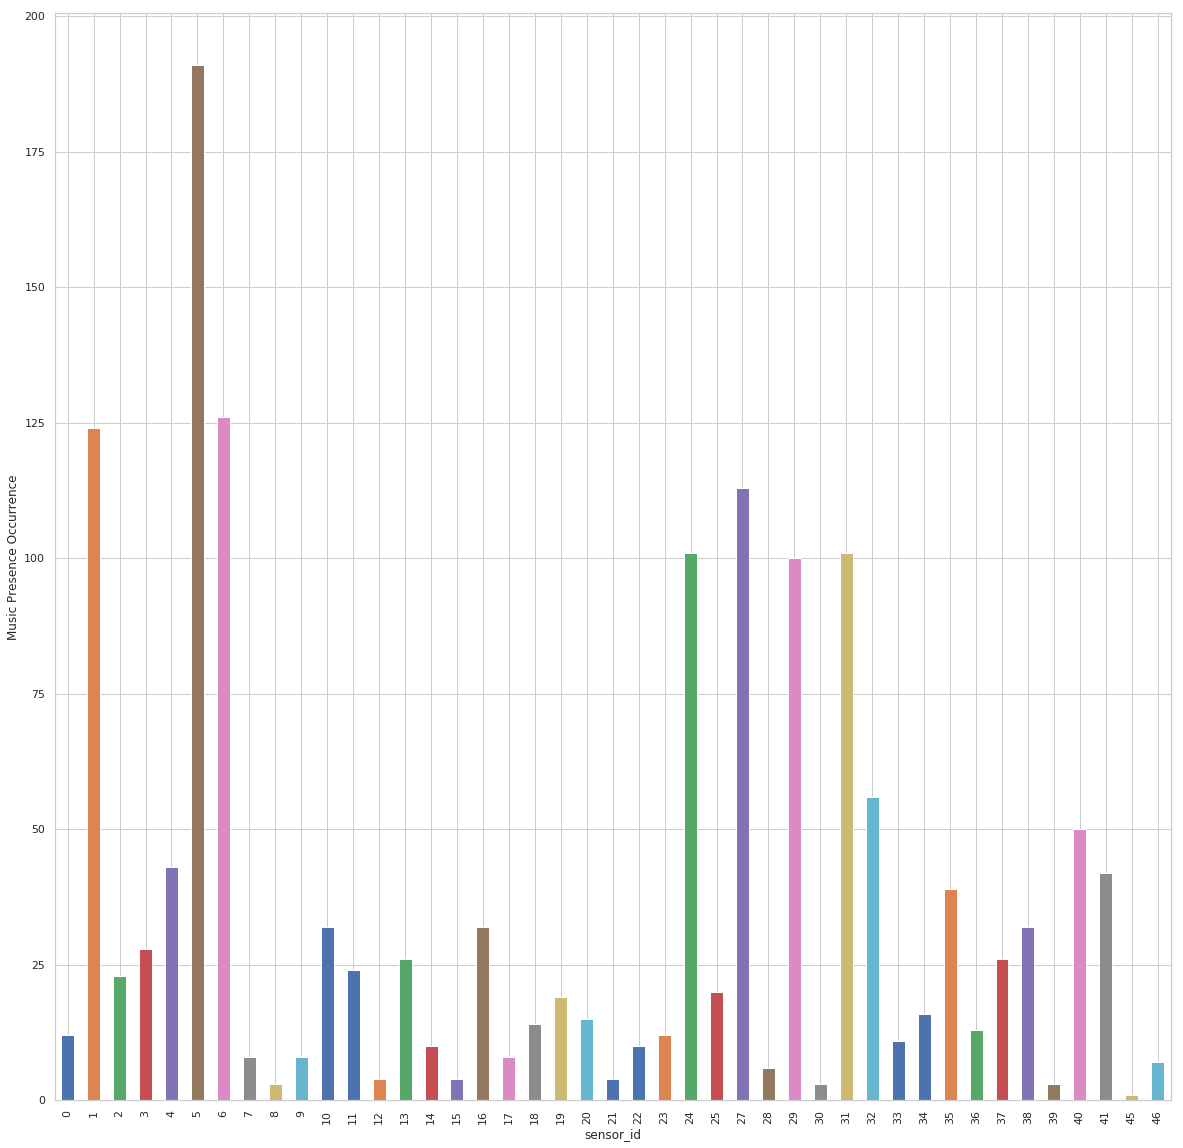

In [7]:
#map how many music samples each sensor captured

plt.figure(figsize =(20,20))
plt.xlabel('Sensor')
plt.ylabel('Music Presence Occurrence')
musicdf2.groupby('sensor_id')['6_music_presence'].count().plot.bar()


### Types of Music Samples

This dataset does contain subcategories - stationary, mobile, uncertain source - below presence of music which would greatly help my analysis. It is not detailed in telling us if the stationary music refers to a concert or what each one individually is, but it is still helpful to look at each subcategory in relation to music in general. 

By looking at the ratio of true/false, I found there was a much greater presence of music from stationary and uncertain sources rather than mobile. I would think this is because music from a mobile phone is often listened to through earphones or not really displayed loudly. 

## What percent of recordings have music?

By looking at the % of recordings that have music, we are able to put music presence in context with the larger dataset at hand and better visualize how much noise is due to music. I decided to do this in the next few cells both in general and according to year, which adds a factor of time. Looking at the pie charts below, it seems that this percentage really doesn't change too much over the years which gives us some confidence that over the years music presence is largely steady and somewhat predictable. Further, there are 8 label categories including music. Generally, music accounts for about 9% according to the pie cha


Text(0,0.5,'')

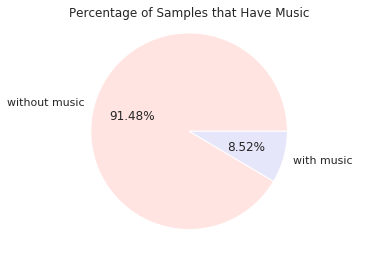

In [8]:
#Find what percentage of samples are music
values = musicdf1['6_music_presence'].value_counts()

#plot the data 
my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')

#adjust graph title, shape, and labels
plt.title('Percentage of Samples that Have Music')
plt.axis('equal')
plt.ylabel('')

Text(0,0.5,'')

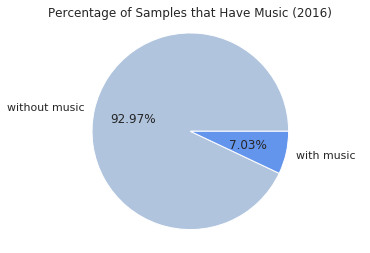

In [9]:
#Plot percentage of music samples by year (2016)

#reduce df to include only rows from 2016
df1 = musicdf1.loc[musicdf1['year'] == 2016]

values = df1['6_music_presence'].value_counts()

my_color = ['lightsteelblue', 'cornflowerblue']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2016)')
plt.axis('equal')
plt.ylabel('')

Text(0,0.5,'')

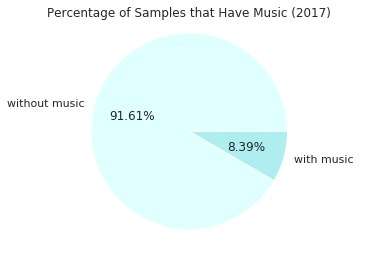

In [10]:
#Plot percentage of music samples by year (2017)

#reduce df to include only rows from 2017
df2 = musicdf1.loc[musicdf1['year'] == 2017]

values = df2['6_music_presence'].value_counts()

my_color = ['lightcyan', 'paleturquoise']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2017)')
plt.axis('equal')
plt.ylabel('')

Text(0,0.5,'')

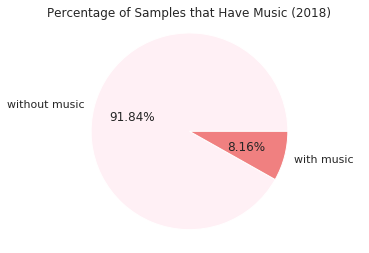

In [11]:
#Plot percentage of music samples by year (2018)

#reduce df to include only rows from 2018
df3 = musicdf1.loc[musicdf1['year'] == 2018]

values = df3['6_music_presence'].value_counts()

my_color = ['lavenderblush', 'lightcoral']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2018)')
plt.axis('equal')
plt.ylabel('')


Text(0,0.5,'')

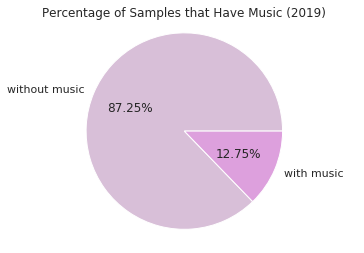

In [12]:
#Plot percentage of music samples by year (2019)

#reduce df to include only rows from 2019
df4 = musicdf1.loc[musicdf1['year'] == 2019]

values = df4['6_music_presence'].value_counts()

my_color = ['thistle', 'plum']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2019)')
plt.axis('equal')
plt.ylabel('')

## Exploring Subcategories


### Types of Music Samples

This dataset does contain subcategories - stationary, mobile, uncertain source - below presence of music which would greatly help my analysis. It is not detailed in telling us if the stationary music refers to a concert or what each one individually is, but it is still helpful to look at each subcategory in relation to music in general. 

By looking at the ratio of true/false, I found there was a much greater presence of music from stationary and uncertain sources rather than mobile. I would think this is because music from a mobile phone is often listened to through earphones or not really displayed loudly. 

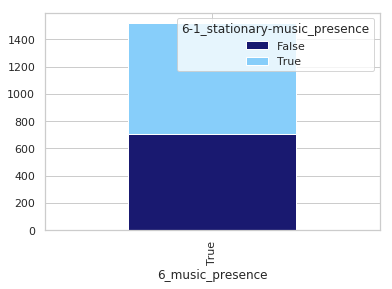

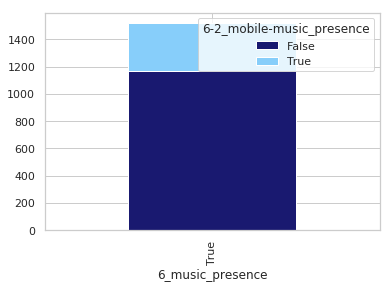

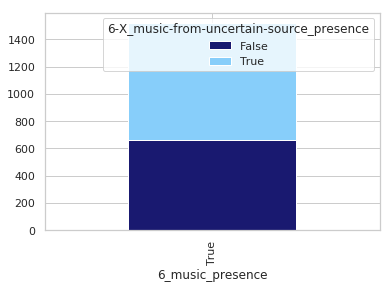

In [13]:
#Plot ratio of types of music to all occurrences of music

#set colors
colors = ['midnightblue', 'lightskyblue']

fig = go.Figure(data=[go.Bar(x=['6-1_stationary-music_presence',  '6-2_mobile-music_presence', '6-X_music-from-uncertain-source_presence'], 
                              y =[df['6-1_stationary-music_presence'].sum(),
                                  df['6-2_mobile-music_presence'].sum(), 
                                  df['unicorn'].sum() ], 
                                  name='True'),
                       go.Bar(x=['6-1_stationary-music_presence',  '6-2_mobile-music_presence', '6-X_music-from-uncertain-source_presence'], 
                              y =[L-df['6-1_stationary-music_presence'].sum(),
                                  L-df['6-2_mobile-music_presence'].sum(), 
                                  L-df['unicorn'].sum()], 
                                  name='False')])
fig1.update_layout(barmode='stack',   bargap=0.07, width=600, height=400




#make stacked bar plot for each occurrence
musicdf2.groupby(['6_music_presence','6-1_stationary-music_presence']).size().unstack().plot(kind='bar', color = colors, stacked=True)
musicdf2.groupby(['6_music_presence','6-2_mobile-music_presence']).size().unstack().plot(kind='bar', color = colors, stacked=True)
musicdf2.groupby(['6_music_presence','6-X_music-from-uncertain-source_presence']).size().unstack().plot(kind='bar', color = colors, stacked=True)

### More with Time

After having explored the data set with music presence in general, I wanted to look more deeply into the subcategories, in a similar way above by time, to compare and see if there were any values proportionally higher and just to visualize it in a different way. However, I found that stationary and mobile presence curved in a similar way over the years, but stationary music was proportionally greater (as expected from the charts above).


In [14]:
#create 2 new dfs that melt the music subcategories into one column: one with both true/false values, one with only true
musicdf3 = pd.melt(musicdf2, id_vars=['audio_filename','week','year','day','hour','sensor_id','borough','split','6_music_presence'], value_vars=['6-1_stationary-music_presence','6-2_mobile-music_presence',' 6-X_music-from-uncertain-source_presence'], var_name = 'subcategories')
musicdf4 = musicdf3[musicdf3['value'] == True] 
musicdf3.reindex()

#new df
musicdf3.head()


/share/apps/anaconda3/5.3.1/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,audio_filename,week,year,day,hour,sensor_id,borough,split,6_music_presence,subcategories,value
0,01_000061.wav,27,2017,5,20,1,Manhattan,train,True,6-1_stationary-music_presence,True
1,01_000159.wav,32,2017,1,18,1,Manhattan,train,True,6-1_stationary-music_presence,True
2,01_000227.wav,49,2017,6,10,1,Manhattan,train,True,6-1_stationary-music_presence,True
3,01_000392.wav,47,2017,5,19,1,Manhattan,train,True,6-1_stationary-music_presence,False
4,01_000443.wav,12,2017,0,21,1,Manhattan,train,True,6-1_stationary-music_presence,True


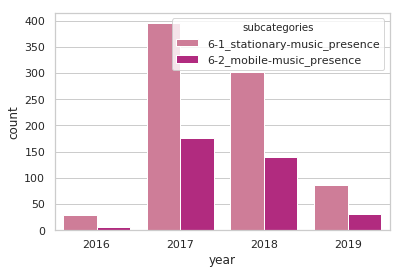

In [15]:
#plot subcategories of music over the years side by side for comparison
palette = ['palevioletred','mediumvioletred']
sns.countplot(x='year', hue='subcategories', palette=palette, data=musicdf4)

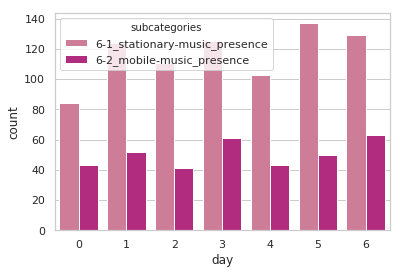

In [16]:
palette = ['palevioletred','mediumvioletred']
sns.countplot(x='day', hue='subcategories', palette=palette, data=musicdf4)


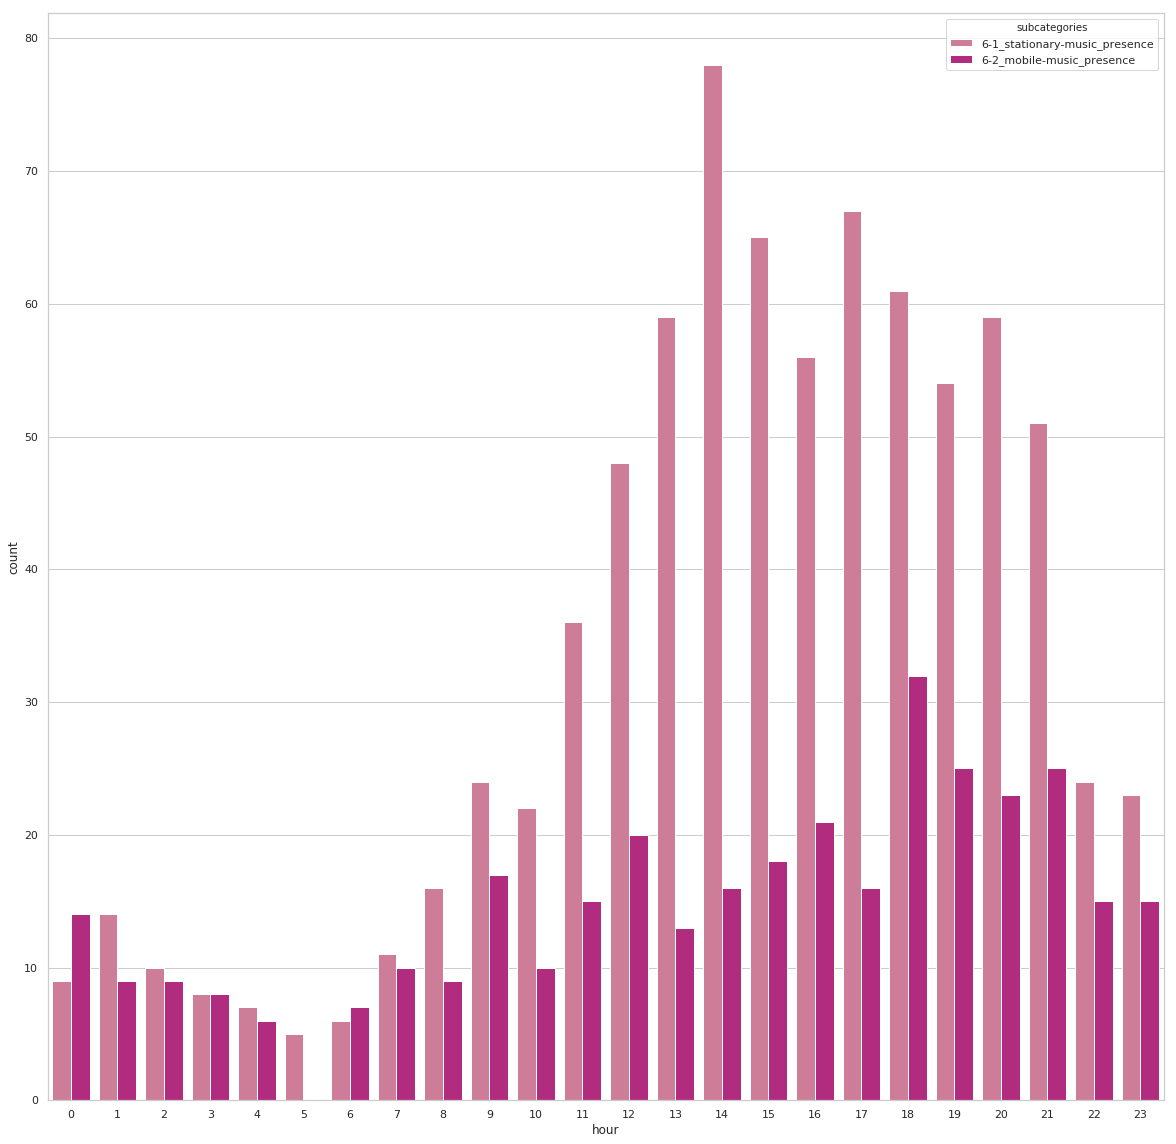

In [17]:
plt.figure(figsize =(20,20))
sns.countplot(x='hour', hue='subcategories', palette=palette, data=musicdf4)


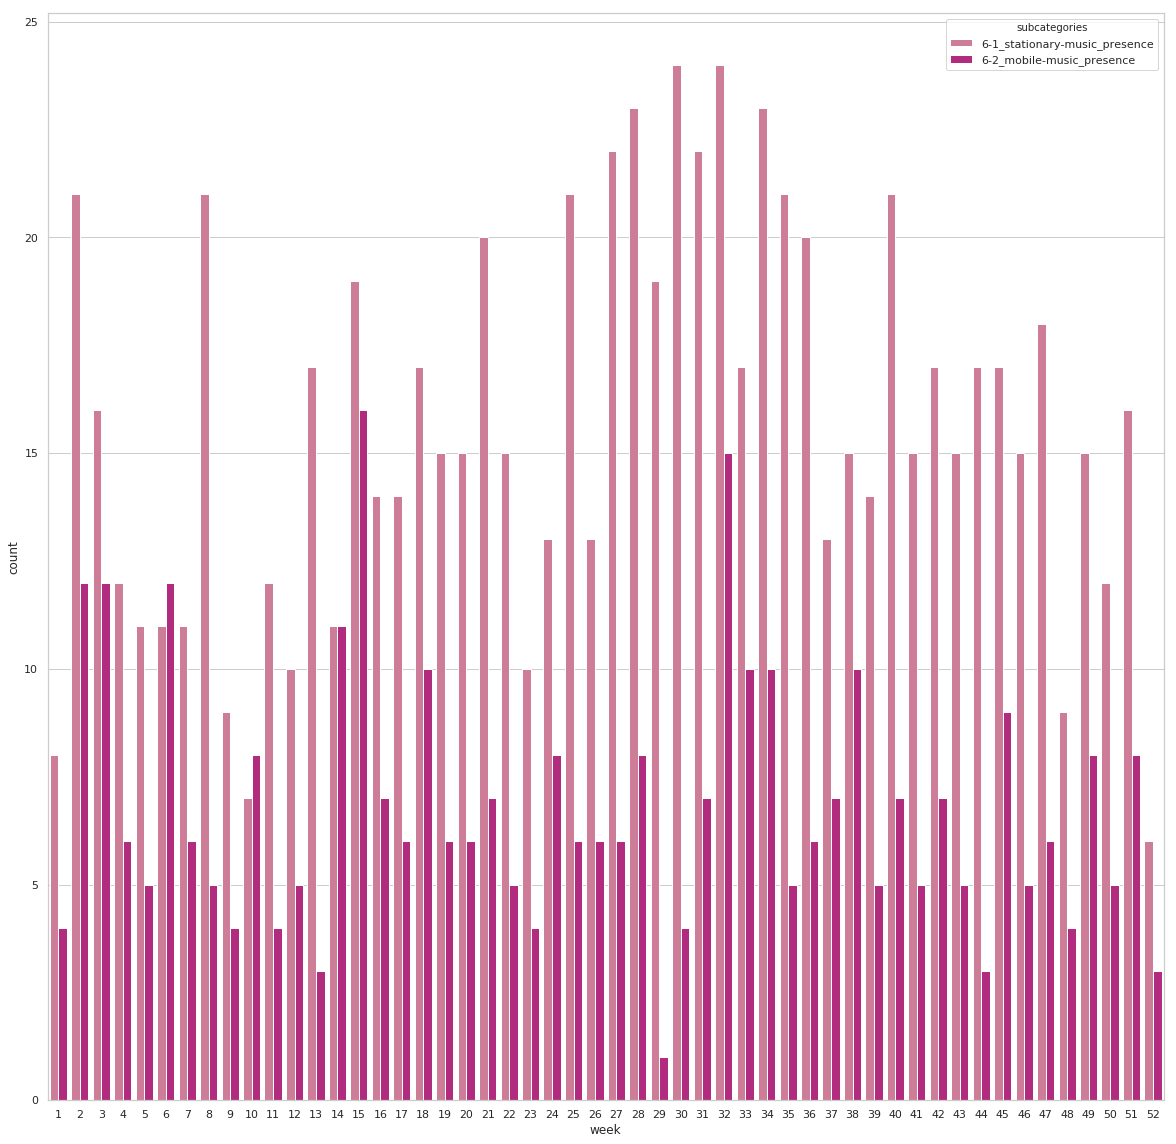

In [18]:
plt.figure(figsize =(20,20))

sns.countplot(x='week', hue='subcategories', palette=palette, data=musicdf4)

                               audio_filename  week  year  day  hour  \
subcategories                                                          
6-1_stationary-music_presence             813   813   813  813   813   
6-2_mobile-music_presence                 353   353   353  353   353   

                               sensor_id  borough  split  6_music_presence  \
subcategories                                                                
6-1_stationary-music_presence        813      813    813               813   
6-2_mobile-music_presence            353      353    353               353   

                               value  
subcategories                         
6-1_stationary-music_presence    813  
6-2_mobile-music_presence        353  


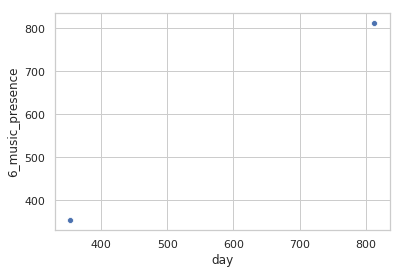

In [26]:
scatter = musicdf4.groupby('subcategories').count()
print(scatter)
sns.scatterplot(x='day',y='6_music_presence', data=scatter)